# Plotting metadynamics sampling data for alanine dipeptide
Here we plot the FES obtained via adaptive biasing force (ABF) for alanine dipeptide in TIP3P water.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Define function for summing hills (accounting for periodic boundaries)

In [2]:
def min_dist(x):
    return np.mod(x+np.pi,2*np.pi)-np.pi


def sum_hills(hills, first, last, points, lbnds, ubnds): 
    # Get number of CVs.
    ncv = int((hills.shape[1] - 2)/2)

    # Split data.
    centers = hills[first:last,1:ncv+1]
    sigmas  = hills[first:last,ncv+1:2*ncv+1]
    height  = hills[first:last,-1]

    # Grid data and sum hills.
    X = np.meshgrid(*[np.linspace(i,j,n) for i,j,n in zip(lbnds,ubnds,points)])
    X = np.array([x.flatten() for x in X]).T

    # Evaluate hills.
    Z = np.zeros((X.shape[0],))
    for i in range(len(Z)):
        Z[i] = np.sum(height*np.prod([np.exp(-min_dist(x-c)**2/(2.*s**2)) for x,c,s in zip(X[i,:], centers.T, sigmas.T)], axis=0))

    return X, Z

Loop through data, and generate contour plots at different time intervals

In [3]:
dt = 0.002 # Timestep in fs. 
hfreq = 1000 # Frequency of hill drops (in iterations)
times = np.array([100, 500, 1000, 2500, 5000, 10000, 20000, 40000]) # Times at which to plot FES (ps).

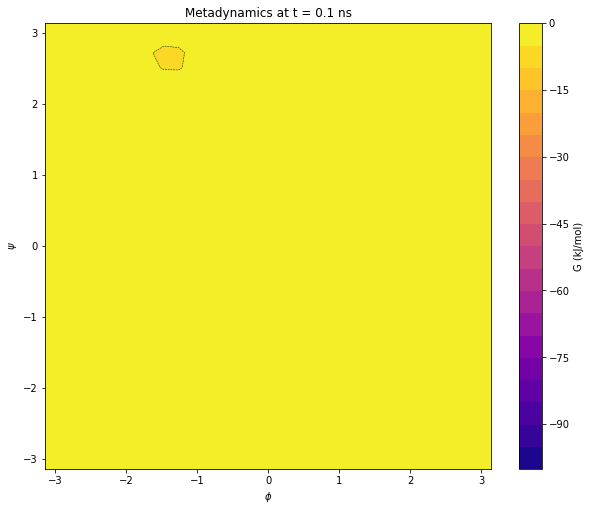

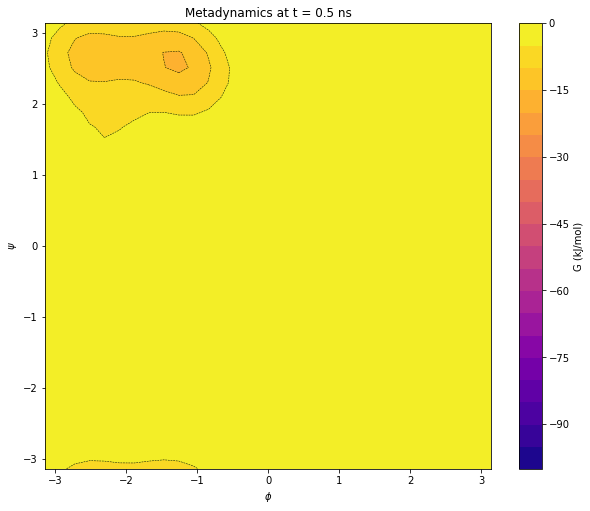

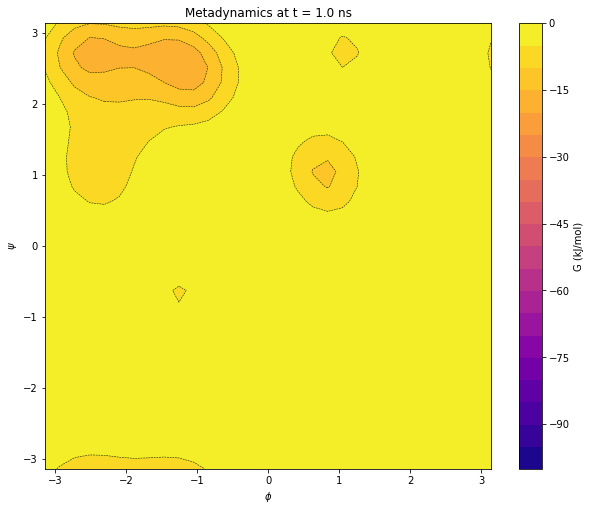

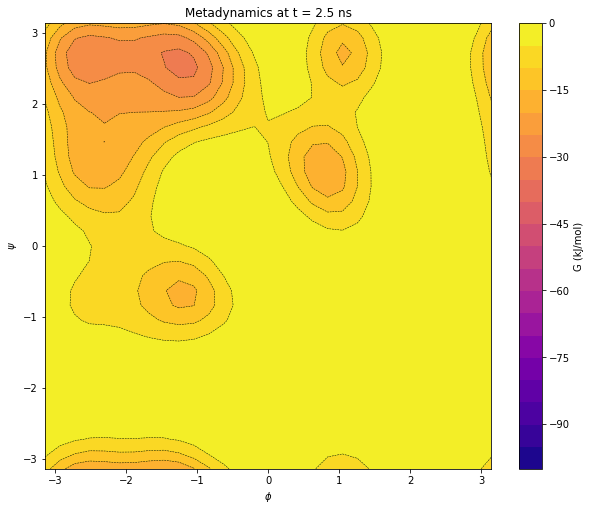

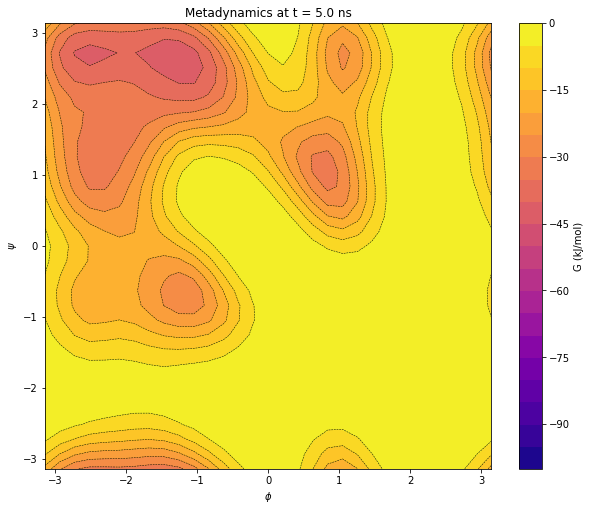

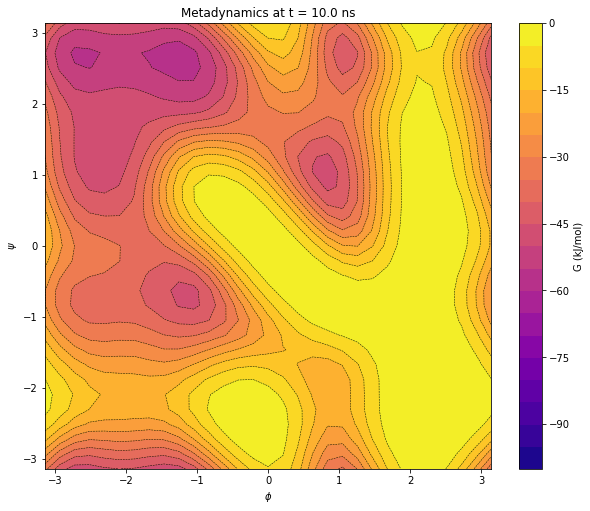

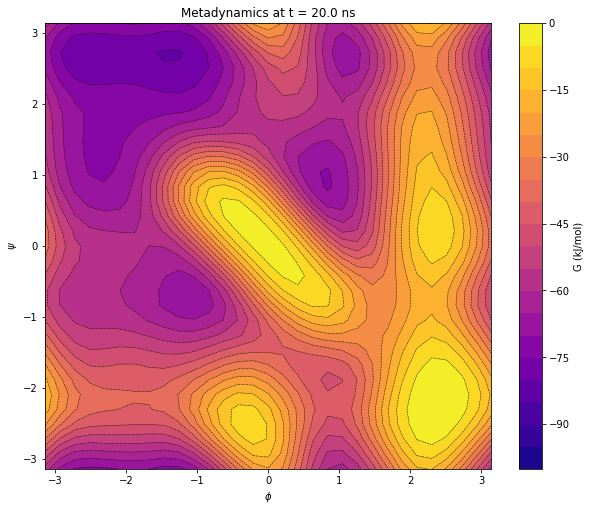

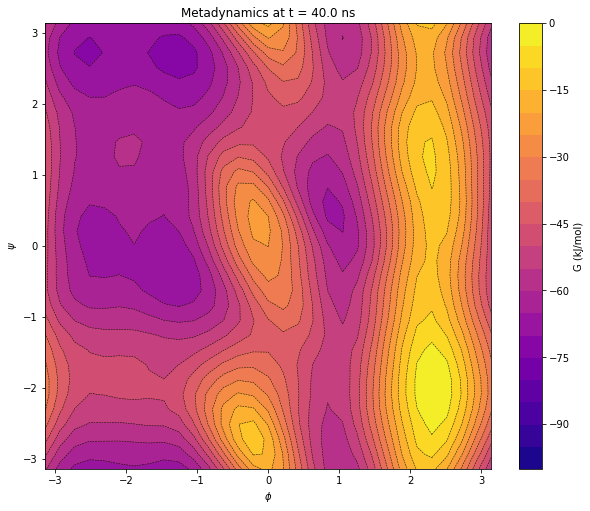

In [4]:
v = np.arange(-100, 5, 5) # Contours to plot.
for t in times:
    fig = plt.figure(figsize=(10, 8.2))
    frame = int(t/(hfreq*dt))
    hills = np.loadtxt("hills.out".format(frame), skiprows=1)

    # Reshape and sum hills.
    x, z = sum_hills(hills, 0, frame, [31, 31], [-np.pi, -np.pi], [np.pi, np.pi])
    xg = x[:,0].reshape((31, 31))
    yg = x[:,1].reshape((31, 31))
    zg = -z.reshape((31, 31))
    zg = zg - np.max(zg)
    
    # Plot data.
    plt.title("Metadynamics at t = {} ns".format(t/1000.))
    plt.contour(xg, yg, zg, v, linewidths=0.5, colors="k")
    plt.contourf(xg, yg, zg, v, cmap=plt.cm.plasma)
    cb = plt.colorbar()
    cb.set_label("G (kJ/mol)")
    plt.xlabel("$\phi$")
    plt.ylabel("$\psi$")
    plt.xlim((-np.pi, np.pi))
    plt.ylim((-np.pi, np.pi))
    plt.axis("equal")
    
    plt.savefig("meta_{:.1f}ns.png".format(t/1000.))